In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

In [2]:
# import the data
feature_data = pd.read_csv("processed_code_solutions/feature_data.csv")
tests = pd.read_csv("processed_code_solutions/tests_data.csv")

In [3]:
# format the data
tests["num_tests_passed"] = tests[["test_1", "test_2", "hidden_test_1", "hidden_test_2"]].sum(axis=1)
tests["%_tests_passed"] = tests["num_tests_passed"]/4*100
tests["source"] = tests["source"].replace({"bard":"Bard", "gpt3.5":"ChatGPT-3.5", "bing":"Bing", "gpt4":"ChatGPT-4", "student":"Human"})
feature_data["source"] = feature_data["source"].replace({"bard":"Bard", "gpt3.5":"ChatGPT-3.5", "bing":"Bing", "gpt4":"ChatGPT-4", "student":"Human"})

data = feature_data.merge(tests, on=["name", "source", "style", "version"])
data = data[(data["num_tests_passed"]!=4) & (data["source"]!="Human")]
data["source"] = pd.Categorical(data["source"], ["Bard", "ChatGPT-3.5", "Bing", "ChatGPT-4"])
data = data.sort_values("source").reset_index(drop=True)

In [4]:
# information needed for the plot
colours = {"Bard": (1.0, 0.8509803921568627, 0.1843137254901961),
           "Bing": (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
           "ChatGPT-3.5": (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
           "ChatGPT-4": (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)}

In [5]:
# renaming the columns with human-readable names
data.columns = ["name", "source", "style", "version", "code", "Number of characters", "Number of lines", "Average line length", "Maximum line length", "Number of comments", 
                "Number of if statements", "Number of for loops", "Number of switch statements", 
                "Number of digits", "Number of exceptions thrown", "Number of empty lines", 
                "Number of print statements", "used_boolean", "used_List", "used_Integer", "used_Point", "used_arrayList", "used_stringBuilder", "Number of files", 
                "Number of method declarations", "Number of field variables declared", "Number of local variables declared", 
                "Number of classes", "Number of variables referenced", "Number of method invocations", 
                "Number of imports", "Average variable name length", "Maximum variable name length", "Average comment length", "Maximum comment length",
                "test_1", "test_2", "hidden_test_1", "hidden_test_2", "num_tests_passed", "%_tests_passed"]

In [6]:
# extracting only continuous features
aspects = ["Number of exceptions thrown", "Average comment length", "Number of comments", "Number of field variables declared",
           "Number of local variables declared", "Average line length", "Average variable name length", "Number of switch statements", 
           "Number of variables referenced", "Number of lines", "Number of if statements", "Maximum variable name length",
           "Number of digits", "Number of classes", "Maximum line length", "Number of method declarations"]

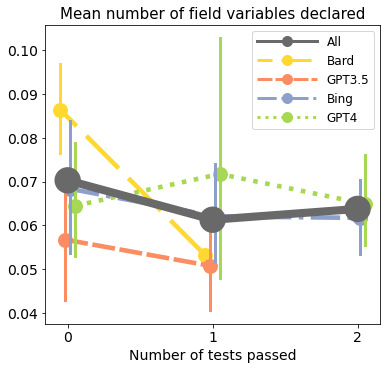

In [7]:
# create the plot
plt.rcParams.update({"font.size": 11})
fig, ax = plt.subplots(figsize=(6, 5.5))

# plot the grouped data
source = sns.pointplot(data=data, 
                       x="num_tests_passed", 
                       y="Number of field variables declared", 
                       hue="source",
                       palette=colours, 
                       errwidth=3, 
                       dodge=True, 
                       ax=ax, 
                       scale=1.7,
                       linestyles=[(5, (10, 3)), (0, (5, 1)), "dashdot", "dotted"])

# plot the overall data
overall = sns.pointplot(data=data, 
                        x="num_tests_passed", 
                        color="dimgray", 
                        scale=3, 
                        errorbar=None, 
                        y="Number of field variables declared", 
                        ax=ax)
sns.scatterplot(data=data, 
                x="num_tests_passed", 
                color="dimgray", 
                ax=ax)
overall.collections[4].set_zorder(100)
for line in overall.lines:
    line.set_zorder(100)
    
# set the labels
ax.set_title("Mean number of field variables declared", 
             fontsize=15, 
             pad=6)
ax.set_xlabel("Number of tests passed", 
              size=14)
ax.set_ylabel("")
ax.tick_params(axis="y", 
               labelsize=14)
ax.tick_params(axis="x", 
               labelsize=14)

# create a custom legend
ax.get_legend().remove()
plt.legend(numpoints=1, 
           handlelength=5, 
           ncol=1, 
           fontsize=12,
           handles=[Line2D([], [], label='All', color="dimgray", linewidth=3, linestyle="solid", marker='o', markersize=10),
                    Line2D([], [], label='Bard', color=colours["Bard"], linewidth=3, linestyle=(5, (10, 3)), marker='o', markersize=10), 
                    Line2D([], [], label='GPT3.5', color=colours["ChatGPT-3.5"], linewidth=3, linestyle=(0, (5, 1)), marker='o', markersize=10), 
                    Line2D([], [], label='Bing', color=colours["Bing"], linewidth=3, linestyle="dashdot",marker='o', markersize=10),
                    Line2D([], [], label='GPT4', color=colours["ChatGPT-4"], linewidth=3, linestyle="dotted", marker='o', markersize=10)]);

# save the plot
plt.savefig("plots/single_interaction.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")

# # modifying the plot for the report
# ax.set_title("")
# ax.set_ylabel("Number of (scaled) field variables declared", fontsize=14)

# # save the plot for the report
# plt.savefig("report_plots/single_interaction.png", 
#             dpi=300,
#             bbox_inches="tight",
#             facecolor="white")

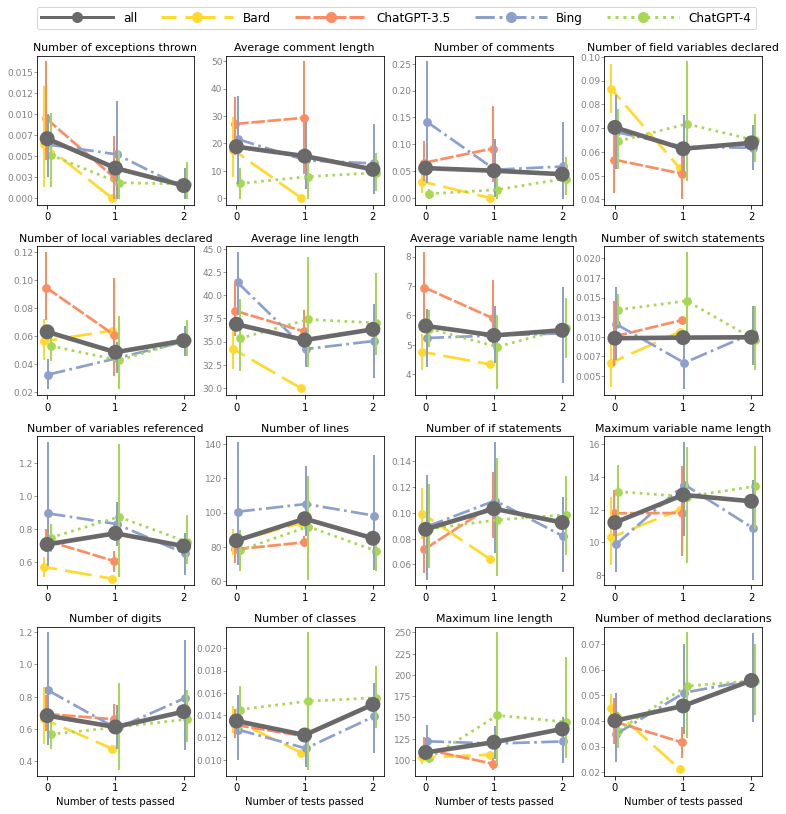

In [8]:
# create the plot
fig, axes = plt.subplots(ncols=4, 
                         nrows=4, 
                         figsize=(13, 13.25))
fig.subplots_adjust(hspace=0.275)

for ax, aspect in zip(axes.reshape(-1), aspects):
    
    # plot the grouped data
    sources = sns.pointplot(data=data, 
                            x="num_tests_passed", 
                            y=aspect, 
                            hue="source",
                            palette=colours, 
                            errwidth=2, 
                            dodge=True, 
                            ax=ax,
                            linestyles=[(5, (10, 3)), (0, (5, 1)), "dashdot", "dotted"])
    
    # plot the overall data 
    overall = sns.pointplot(data=data, 
                            x="num_tests_passed", 
                            color="dimgray", 
                            scale=1.7, 
                            errorbar=None, 
                            y=aspect, 
                            ax=ax)
    sns.scatterplot(data=data, 
                    x="num_tests_passed", 
                    color="dimgray", 
                    ax=ax)
    overall.collections[4].set_zorder(100)
    for line in overall.lines:
        line.set_zorder(100)
    
    # set the labels
    ax.set_title(aspect, fontsize=11, pad=4.5)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="y",
                   colors="gray", 
                   labelsize=9)
    ax.tick_params(axis="y", 
                   which='major', 
                   pad=0)
    # set axis labels for the outer plots
    if aspect in ["Number of switch statements", "Number of exceptions thrown"]:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    if aspect in aspects[-4:]:
        ax.set_xlabel("Number of tests passed")

    # remove the legend from each small plot
    ax.get_legend().remove()

# create a custom legend
plt.legend(numpoints=1, 
           handlelength=6, 
           loc=(-3.6, 5), 
           ncol=5, 
           fontsize=12,
           handles=[Line2D([], [], label='all', color="dimgray", linewidth=3, linestyle="solid", marker='o', markersize=10),
                    Line2D([], [], label='Bard', color=colours["Bard"], linewidth=3, linestyle=(5, (10, 3)), marker='o', markersize=10), 
                    Line2D([], [], label='ChatGPT-3.5', color=colours["ChatGPT-3.5"], linewidth=3, linestyle=(0, (5, 1)), marker='o', markersize=10), 
                    Line2D([], [], label='Bing', color=colours["Bing"], linewidth=3, linestyle="dashdot",marker='o', markersize=10),
                    Line2D([], [], label='ChatGPT-4', color=colours["ChatGPT-4"], linewidth=3, linestyle="dotted", marker='o', markersize=10)]);

# save the plot
plt.savefig("plots/all_interactions.png", 
            dpi=300,
            bbox_inches="tight",
            facecolor="white")